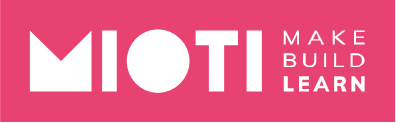
<br/>
<center style="color:#888">Módulo Data Science Advanced<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Óscar Picazo Montoya<br>oscarpm@faculty.mioti.es</center>


# Worksheet S2: Procesamiento de imágenes

## Objetivos

El objetivo de este worksheet es que aprendas técnicas básicas de manipulación de imágenes.

Para utilizar este worksheet deberás tener instaladas las bibliotecas:

* `numpy`
* `pandas`
* `matplotlib`
* `imageio`
* `scikit-image`

Te recomiendo que te instales un entorno virtual de anaconda para esta asignatura.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from skimage import data, io, filters, img_as_ubyte


import warnings
warnings.filterwarnings("ignore")

Esta vez vamos a tratar un tipo de datos distinto a lo que hemos hecho hasta ahora: **imágenes**.


## ¿Qué es una imagen?

Para un ordenador una imagen es una matriz de 2 dimensiones (anchura y altura). Cada imagen está compuesta por píxels que son cada uno de los puntos básicos que componen una imagen.

Así es como vería un ordenador una imagen:

<img src="img/imagen.png">

## Espacios de color

Cada uno de los píxeles, representa un valor de color. Generalmente trabajamos con tres tipos de `espacios de color`:

* **Monocromo**: cada pixel puede valer 0 (negro) o 255 (blanco).
* **Escala de grises**: en los que cada pixel contiene información del nivel de intensidad de luz. Cualquier valor entre 0 (negro) y 255 (blanco).
* **Color (RGB)**: cada pixel tiene 3 valores de intensidad independientes, cada uno relativo a un `canal` de color. R=Rojo, G=Verde y B=Azul. El módelo RGB es un modelo aditivo que mediante la combinación de estos tres componentes podemos obtener todos los colores como se puede ver en la siguiente figura:

<img src="img/RGB-color-additive-model.jpg" width="200px">

### Preguntas

* ¿Por qué se denomina a el modelo RGB "aditivo"?

## Carga de imágenes

Para empezar a trabajar con imágenes vamos a utilizar `skimage` que es una extensión de `sci-kit` para manipular imágenes.

Empezaremos con lo más basico, para poder cargar una imagen lo haremos con el siguiente código:

In [2]:
img = io.imread("img/test.png")

Una vez cargada la imagen la podemos mostrar en pantalla con:

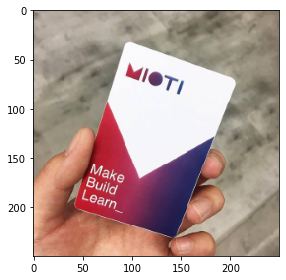

In [3]:
io.imshow(img)
io.show()

In [4]:
img

array([[[162, 152, 142],
        [176, 166, 156],
        [181, 171, 161],
        ...,
        [134, 120, 107],
        [135, 121, 108],
        [135, 121, 108]],

       [[144, 134, 124],
        [157, 147, 137],
        [167, 157, 147],
        ...,
        [134, 120, 107],
        [135, 121, 108],
        [135, 121, 108]],

       [[134, 124, 114],
        [138, 128, 118],
        [150, 140, 130],
        ...,
        [136, 122, 109],
        [136, 122, 109],
        [135, 121, 108]],

       ...,

       [[223, 174, 149],
        [227, 178, 153],
        [229, 180, 155],
        ...,
        [117, 108,  91],
        [116, 107,  90],
        [116, 107,  90]],

       [[227, 182, 155],
        [229, 185, 157],
        [223, 179, 152],
        ...,
        [117, 108,  91],
        [116, 107,  90],
        [115, 106,  89]],

       [[229, 188, 160],
        [231, 190, 162],
        [229, 188, 160],
        ...,
        [115, 106,  89],
        [116, 107,  90],
        [114, 105,  88]]

Como podemos ver la imagen internamente es un array de `numpy` que tiene 3 dimensiones: anchura, altura y canal.

In [5]:
print(img.shape)

(250, 250, 3)


En este caso, la imagen tiene 250 pixels de anchura, 250 de altura y 3 canales (RGB). Es importante destacar el sentido de cada coordenada (fíjate en los ejes de coordenadas de la imagen superior):

* Anchura: Va de izquierda a derecha.
* Altura: Va de arriba a abajo
* Espacio de color: si es RGB, va R en la coordenada 0, G en la 1 y B en la dos.

<img src="img/image_coordinates.png">

En la imagen anterior si queremos acceder a un pixel cerca del centro podemos hacerlo de la siguiente manera:

In [6]:
print(img[125][125])

[245 246 251]


Como podemos ver el valor obtenido es muy cercano al blanco puro RGB = (255, 255, 255). Como es lógico.

Al ser la imagen un array de `numpy` podemos hacer cualquier operación que se nos ocurra.

In [7]:
img.max()

255

In [8]:
img.mean()

152.28282133333335

In [9]:
img.min()

8

Por ejemplo si queremos extraer un canal concreto lo podemos hacer de la siguiente manera:

In [10]:
img_bgr = io.imread("img/RGB-color-additive-model.jpg")
img_r = img_bgr[:,:,0]
img_g = img_bgr[:,:,1]
img_b = img_bgr[:,:,2]

Podemos mostrar el canal R sólo:

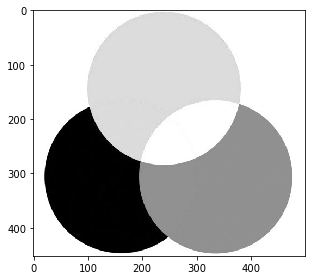

In [11]:
io.imshow(img_r)
io.show()

El G (verde):

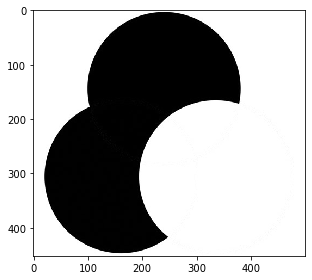

In [12]:
io.imshow(img_g)
io.show()

El azul (B)

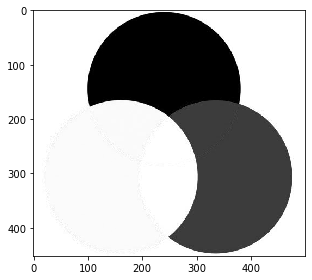

In [13]:
io.imshow(img_b)
io.show()

Podemos ver que en cada canal, su color aparece de forma más blanca ya que si mostramos los valores del canal Rojo en un espacio de grises el valor máximo 255 coincide con el blanco.

## Transformaciones de espacio de color

Si queremos transformar una imagen de color a blanco y negro lo podemos hacer extrayendo un canal, pero en muchas ocasiones perderíamos mucha información. Para hacerlo de una manera más cercana a como lo percibe el ser humano existen funciones que transforman de rgb a escala de grises:

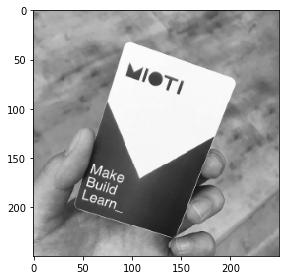

In [14]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img)
io.imshow(img_gray)
io.show()

Es importante destacar que cuando una imagen se convierte a escala de grises, generalmente los valores originales [0 a 255] se suelen transformar a una escala [0, 1] ya que suele ser una representación mucha más cómoda para trabajar.

In [15]:
print(img_gray)

[[0.60158431 0.65648627 0.67609412 ... 0.47857922 0.48250078 0.48250078]
 [0.53099608 0.58197647 0.62119216 ... 0.47857922 0.48250078 0.48250078]
 [0.49178039 0.50746667 0.55452549 ... 0.48642235 0.48642235 0.48250078]
 ...
 [0.71611765 0.73180392 0.73964706 ... 0.42622275 0.42230118 0.42230118]
 [0.74359137 0.75424    0.73099333 ... 0.42622275 0.42230118 0.41837961]
 [0.76350471 0.77134784 0.76350471 ... 0.41837961 0.42230118 0.41445804]]


## Histogramas

Al igual que en otros tipos de datos los histogramas son una de las herramientas más útiles a la hora de comprender la distribución de color de los píxels. Podemos obtener histogramas de las imágenes a partir de la siguiente función:

*No hace falta que entiendas esta función, pero si te atreves a ver como funciona verás que convierte cada canal de la imagen en una array unidimensional y aplica un histograma a cada uno de ellos*

In [16]:
def plot_histogram(img):
    from matplotlib import pyplot as plt
    n_dimensiones = len(img.shape)
    if n_dimensiones == 2: # Solo X,Y
        img_int = 255 * img.flatten()    
        plt.hist(img_int, bins = np.arange(256), color="darkgrey")
        plt.title("Gray scale histogram") 
    elif n_dimensiones == 3: # X,Y y Canal
        if img.shape[2] == 3: # R,G,B
            img_r = img[:,:,0].flatten()        
            img_g = img[:,:,1].flatten()
            img_b = img[:,:,2].flatten()
            
            if img.dtype == np.dtype('uint8'):
                plt.hist(img_r, bins = np.arange(256), color = "red") 
                plt.hist(img_g, bins = np.arange(256), color = "green")
                plt.hist(img_b, bins = np.arange(256), color = "blue")
            else:
                plt.hist(img_r, bins = np.arange(1, step=1/255), color = "red") 
                plt.hist(img_g, bins = np.arange(1, step=1/255), color = "green")
                plt.hist(img_b, bins = np.arange(1, step=1/255), color = "blue")

            plt.title("Color histogram") 
    plt.show()

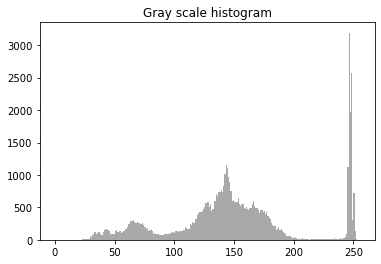

In [17]:
plot_histogram(img_gray)

¿Qué podriamos deducir de este histograma?

* No existen valores muy cercanos al 0 (negro)
* Existe muchos píxels de la imagen con valores muy cercanos al blanco
* La mayor parte de los píxels están alrededor de 140

También podemos ver el histograma para imágenes RGB:

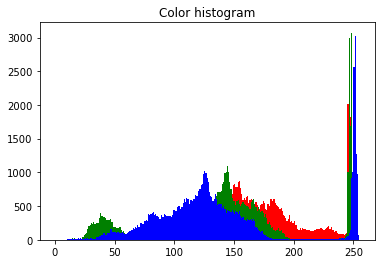

In [18]:
plot_histogram(img)

## Filtros

Los filtros son operaciones que podemos realizar sobre imágenes que típicamente reciben una imagen de entrada y producen otra imagen de salida.

El ejemplo de conversión de RGB a escala de grises es un ejemplo de filtro de conversión de color.

Existen multitud de filtros (piensa en todos los que tiene photoshop o gimp).

### Equalización

Una familia de filtros bastante habituales en fotografía son los de ajuste de equalización del histograma. Que nos permiten "expandir horizontalmente" el rango de los colores de manera que cubran todo el rango de posibles valores. Podemos pensar en la equalización como en una normalización, que tomamos nuestros datos y los expandimos al rango [0, 255].

En `skimage` tenemos estos algoritmos en el paquete `exposure` donde tenemos varias opciones. 

La más básica es `equalize_hist` que nos hace una normalización clásica:

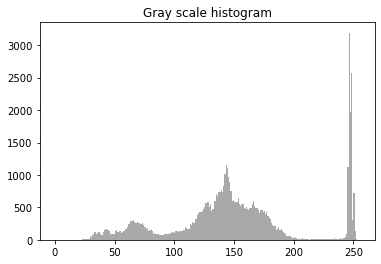

In [19]:
plot_histogram(img_gray)

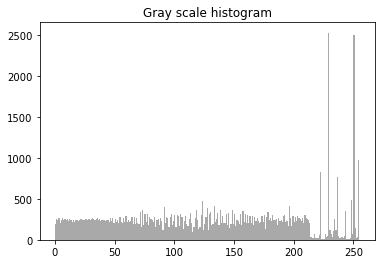

In [20]:
from skimage import exposure

img_equalized = exposure.equalize_hist(img_gray)
plot_histogram(img_equalized)

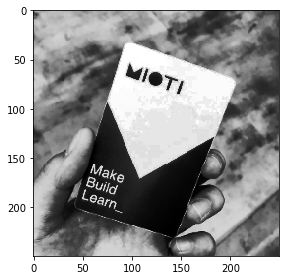

In [21]:
io.imshow(img_equalized)
io.show()

`skimage` disponde de filtros más complejos como la equalización adaptativa donde se tienen en cuenta propiedades de la imagen para mejorar el resultado:

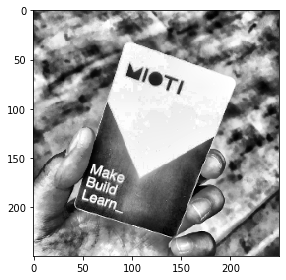

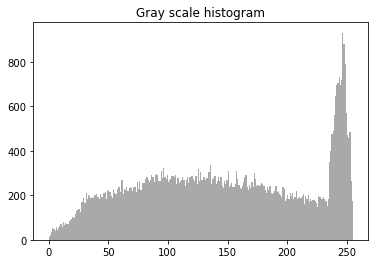

In [22]:
img_equalized_adaptative = exposure.equalize_adapthist(img_gray, clip_limit=0.03)
io.imshow(img_equalized_adaptative)
io.show()
plot_histogram(img_equalized_adaptative)

La utilidad de los filtros de normalización es que nos permiten "normalizar" las imágenes de entrada, haciendo que los cambios de iluminación y contraste se vean reducidos.

Por ejemplo en la siguiente imagen:

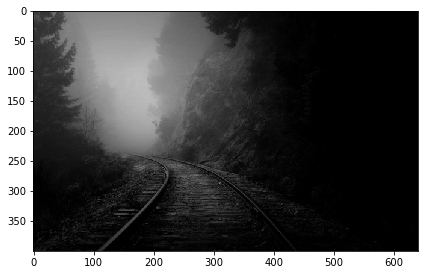

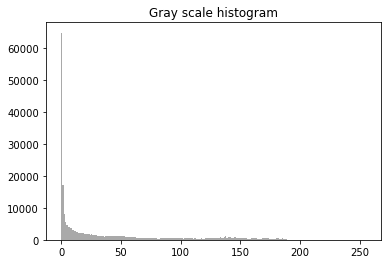

In [23]:
img_dark_rgb = io.imread("img/dark.jpg")
img_dark_gray = rgb2gray(img_dark_rgb)

io.imshow(img_dark_gray)
io.show()
plot_histogram(img_dark_gray)

Puedes ver que la imagen de entrada es muy oscura y al ecualizarla mejora mucho el resultado:

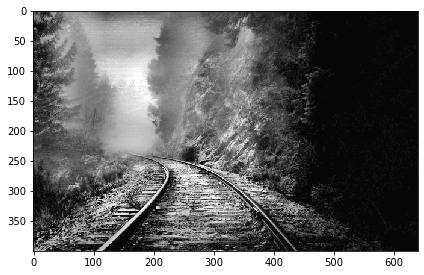

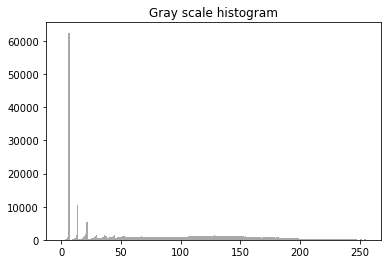

In [24]:
img_dark_gray_equalized = exposure.equalize_adapthist(img_dark_gray, clip_limit=0.03)
io.imshow(img_dark_gray_equalized)
io.show()
plot_histogram(img_dark_gray_equalized)

Una vez procesada, podemos guardar el resultado en una imagen:

In [25]:
img_dark_gray_equalized_ub = img_as_ubyte(img_dark_gray_equalized)
imageio.imwrite('dark_equalized.jpg', img_dark_gray_equalized_ub)

### Convoluciones

Las convoluciones son otro tipo de filtros muy importantes y la base de modelos _state of the art_ de reconocimiento de imágenes como son las CNNs (redes neuronales convolucionales).

Una convolución es un filtro que aplica por cada pixel de la imagen una matriz de convolución (kernel).

<img src="img/convolucion.png">

Como puedes ver en la figura por cada pixel de la imagen se aplica el kernel formando un polinomio.

En este caso el valor resultante se calcula:

$$40\times0 + 42\times1 + 46\times0 + 46\times0 + 50\times0 + 55\times0 + 52\times0 + 56\times0 + 58\times0 = 42$$

Las convoluciones son filtros muy interesantes porque en función de la estructura del kernel podemos obtener unos efectos u otros. 

Por ejemplo si aplicamos el siguiente kernel a una imagen cualquiera obtenemos sus bordes horizontales:

In [26]:
kernel_edges_horizontal =  [
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1],
]

Para aplicarlo utilizaremos la función `convolve` que vamos aplicar a una foto de un ajedrezado que cargaremos mediante la función `checkerboard`:

(200, 200)

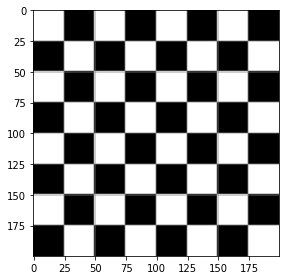

In [27]:
from skimage.data import checkerboard

chess = checkerboard()
io.imshow(chess)
chess.shape

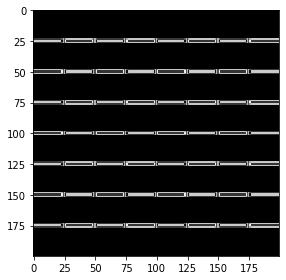

In [28]:
from skimage.filters.edges import convolve

bordes_horizontales = convolve(chess, weights=kernel_edges_horizontal)
io.imshow(bordes_horizontales)

*¿Se te ocurre cómo podríamos obtener los bordes verticales?*

In [29]:
kernel_edges_vertical =  [
    [ 1,  0, -1],
    [ 2,  0, -2],
    [ 1,  0, -1],
]

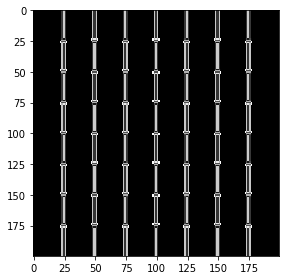

In [30]:
bordes_verticales = convolve(chess, weights=kernel_edges_vertical)

io.imshow(bordes_verticales)

*¿Podríamos aplicar las dos convoluciones a la vez para obtener los bordes de la imagen?*

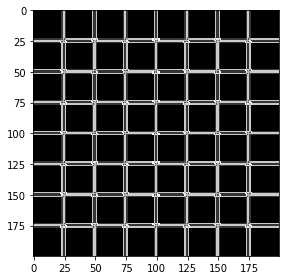

In [31]:
bordes = np.maximum(bordes_verticales, bordes_horizontales)
io.imshow(bordes)

De esta manera hemos obtenido una imagen de "bordes" de la imagen. Existen otros filtros un poco más sofisticados para obtener las imágenes de bordes de una imagen, el más común es el filtro de `sobel` que podemos usarlo en `skimage` de la siguiente manera:

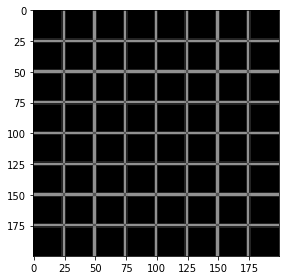

In [32]:
from skimage.filters import sobel

edge_sobel = sobel(chess)
io.imshow(edge_sobel)
io.show()

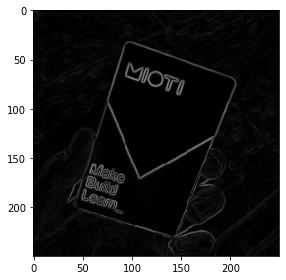

In [33]:
from skimage.filters import sobel

edge_mioti = sobel(img_gray)
io.imshow(edge_mioti)
io.show()

### Mediana

Otro filtro muy habitual es el filtro de mediana. Este filtro consiste en realizar un promedio de los valores de la imagen por ventanas. Se denominada procesamiento en ventanas cuando se subdivide el procesamiento de la imagen en rectángulos.

Puedes ver en la siguiente figura como funciona:

<img src="img/mediana.gif">

¿qué piensas que realizará el filtro de mediana sobre una imagen?.

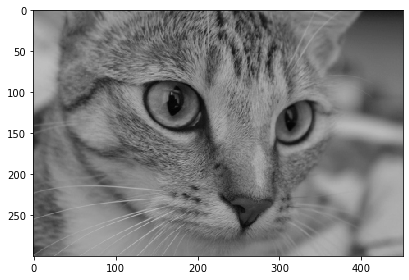

In [34]:
from skimage.data import chelsea

cat = rgb2gray(chelsea())
io.imshow(cat)

Podemos aplicar el filtro de mediana con la función `median`:

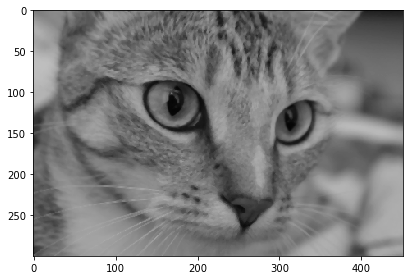

In [35]:
from skimage.filters import median
median_cat = median(cat)
io.imshow(median_cat)
io.show()

¿Ves las diferencias?. Son muy sutiles. Si no las ves podemos amplificar el efecto de la mediana modificando el tamaño de la ventana de procesamiento que por defecto es una ventana 3x3.

Podemos cambiar el tamaño de la ventana de procesamiento pasándola como parámetro en el filtro `median`:

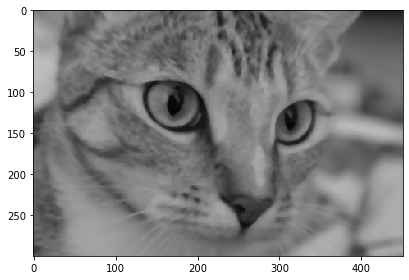

In [36]:
ventana_procesamiento = [
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
]
io.imshow(median(cat, np.array(ventana_procesamiento)))
io.show()

También existen funciones en `skimage` como `disk` y `square` para generar estas ventanas más comodamente:

In [37]:
from skimage.morphology import disk, square

for i in range(1, 4):
    print("{}\n".format(square(i)))

[[1]]

[[1 1]
 [1 1]]

[[1 1 1]
 [1 1 1]
 [1 1 1]]



In [38]:
from skimage.morphology import disk

for i in range(1, 4):
    print("{}\n".format(disk(i)))

[[0 1 0]
 [1 1 1]
 [0 1 0]]

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]



Vamos a aplicar sobre la imagen anterior el filtro de mediana con distintos tamaños de ventana de procesamiento y ver el resultado:

Tamaño de la ventana: 3


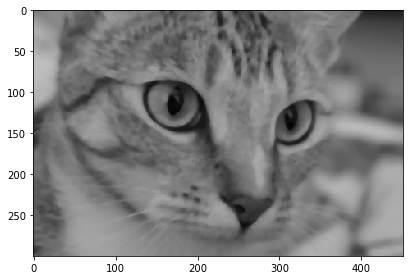

Tamaño de la ventana: 6


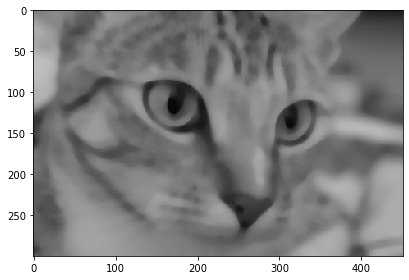

Tamaño de la ventana: 9


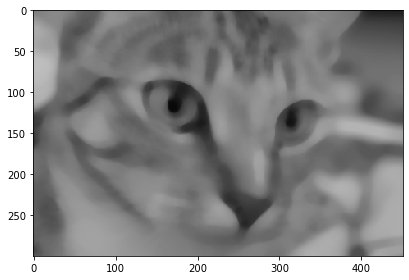

Tamaño de la ventana: 12


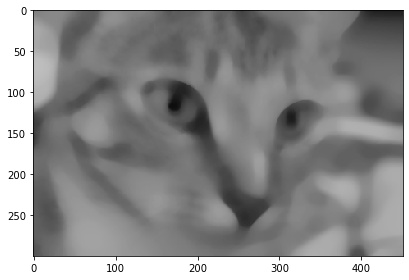

Tamaño de la ventana: 15


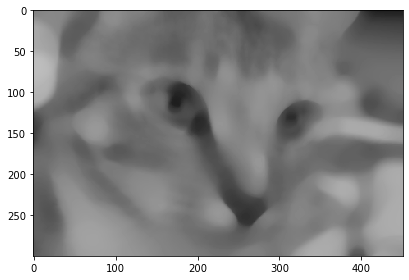

Tamaño de la ventana: 18


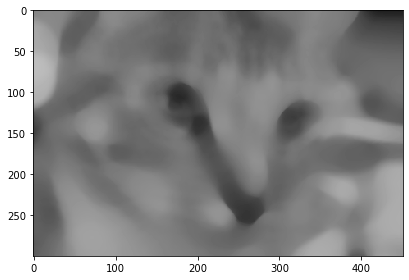

Tamaño de la ventana: 21


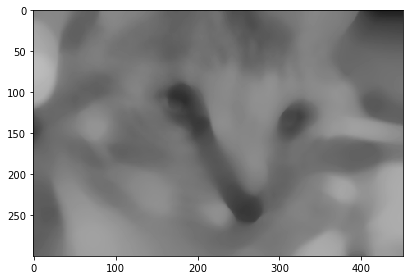

Tamaño de la ventana: 24


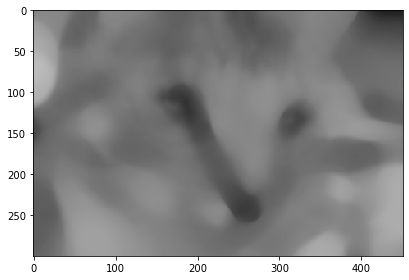

Tamaño de la ventana: 27


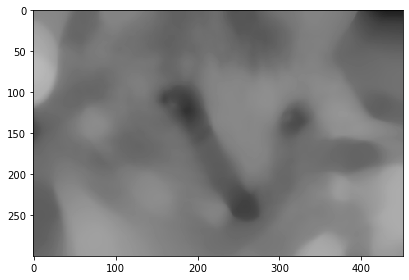

In [39]:
from skimage.filters import median
from skimage.morphology import disk

for i in range(3, 30, 3):
    print("Tamaño de la ventana: {}".format(i))
    median_cat = median(cat, disk(i))
    io.imshow(median_cat)
    io.show()

## Quizz

* ¿Para que puede servir el filtro de mediana?
* ¿Cuáles piensas que son las mayores dificultades en el procesamiento de imágenes?
* En el histograma que hicimos de `img_gray` ¿podríamos inferir que existe un área contigua grande blanca?